# H2O.ai AutoML  

## Import H2O


In [18]:
import h2o
from h2o.automl import H2OAutoML

## Initilize


In [19]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,28 mins 59 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.3
H2O cluster version age:,10 days
H2O cluster name:,H2O_from_python_Evelyn_adeuwe
H2O cluster total nodes:,1
H2O cluster free memory:,1.523 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"


## Import customer churn raw dataset


In [42]:
data_path = r"C:\Users\Evelyn\Dropbox\Evelyn\MMa\Winter 2020 - INSY-695-076 - Adv Topics in Information Syst - 1132020 - 1112 AM\Group Assignment\WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = h2o.import_file(data_path)
df = df.drop('customerID',axis=1)
df

Parse progress: |█████████████████████████████████████████████████████████| 100%


gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## Convert columns to factors

In [39]:
df['gender','SeniorCitizen'] = df['gender','SeniorCitizen'].asfactor()
df['Partner','Dependents'] = df['Partner','Dependents'].asfactor()
df['PhoneService','MultipleLines'] = df['PhoneService','MultipleLines'].asfactor()
df['InternetService','OnlineSecurity'] = df['InternetService','OnlineSecurity'].asfactor()
df['OnlineBackup','DeviceProtection'] = df['OnlineBackup','DeviceProtection'].asfactor()
df['TechSupport','StreamingTV'] = df['TechSupport','StreamingTV'].asfactor()
df['StreamingMovies','Contract'] = df['StreamingMovies','Contract'].asfactor()
df['PaperlessBilling','PaymentMethod'] = df['PaperlessBilling','PaymentMethod'].asfactor()
df['Churn'] = df['Churn'].asfactor()


##  Set the predictor names and the reponse column name

In [49]:
predictors = ['gender','SeniorCitizen','Partner','Dependents','tenure',
             'PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
             'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges']
target = 'Churn'

## Split the dataset into training and validation sets

In [94]:
train, valid = df.split_frame(ratios=[0.7],seed = 7)
print(train.shape)
print(valid.shape)

(4947, 20)
(2096, 20)


## Train different Models

### Random Forest

In [95]:
## initilize
from h2o.estimators import H2ORandomForestEstimator
rf = H2ORandomForestEstimator(seed=7)
## train the model
rf.train(x=predictors, y=target, training_frame=train, validation_frame=valid)
## print accuracy score for the training and testing dataset
print('training accuracy score', rf.auc(train=True))
print('testing accuracy score', rf.auc(valid=True))

drf Model Build progress: |███████████████████████████████████████████████| 100%
training accuracy score 0.8168329378638587
testing accuracy score 0.8272740935128292


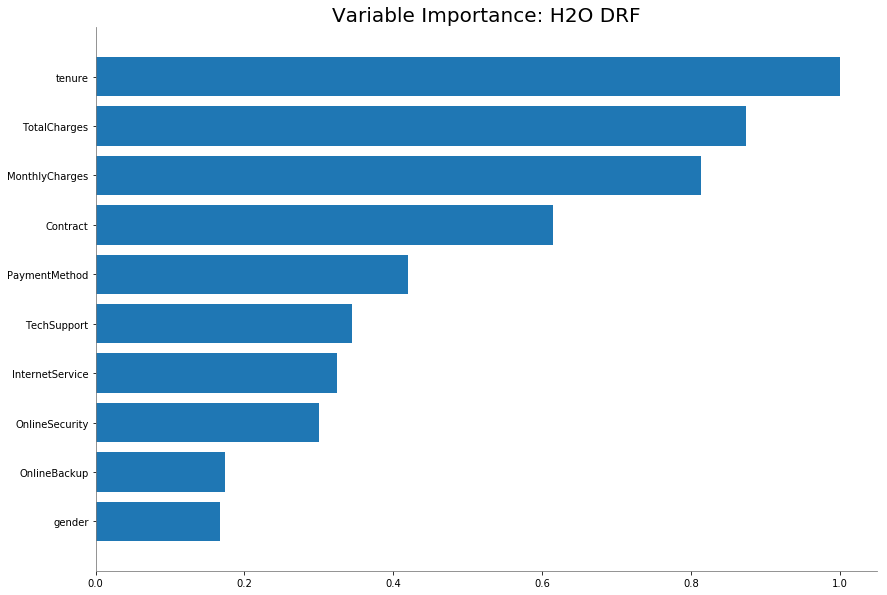

[('tenure', 4773.61376953125, 1.0, 0.1622962504314311),
 ('TotalCharges', 4172.98291015625, 0.8741769048831155, 0.1418756338762834),
 ('MonthlyCharges',
  3887.583740234375,
  0.8143900885002099,
  0.13217245775210537),
 ('Contract', 2936.41650390625, 0.6151349157421663, 0.09983409033440786),
 ('PaymentMethod',
  2005.5159912109375,
  0.4201253155443012,
  0.06818476342416191),
 ('TechSupport', 1645.069580078125, 0.3446172353905507, 0.05593008513793225),
 ('InternetService',
  1547.8934326171875,
  0.3242602999214125,
  0.05262623084101651),
 ('OnlineSecurity',
  1432.4417724609375,
  0.30007492051490325,
  0.04870103444807851),
 ('OnlineBackup', 830.3076171875, 0.1739369076080558, 0.028229307916425715),
 ('gender', 795.8810424804688, 0.16672506007092006, 0.02705885210246543),
 ('DeviceProtection', 791.6064453125, 0.16582959651346754, 0.0269135217246929),
 ('PaperlessBilling',
  756.2872314453125,
  0.1584307545517192,
  0.025712717416766406),
 ('MultipleLines',
  723.8016357421875,
  

In [96]:
## check Variable importance
rf.varimp_plot()
rf.varimp()

In [97]:
## check performance report of testing dataset of the Random Forest Model
performance = rf.model_performance(test_data=valid)
print(performance)


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.14484092894893044
RMSE: 0.38057972745395996
LogLoss: 0.5324398244847648
Mean Per-Class Error: 0.23905134593041732
AUC: 0.8272740935128292
AUCPR: 0.6135219322727372
Gini: 0.6545481870256584

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2851111108064652: 


,,No,Yes,Error,Rate
0,No,1154.0,377.0,0.2462,(377.0/1531.0)
1,Yes,131.0,434.0,0.2319,(131.0/565.0)
2,Total,1285.0,811.0,0.2424,(508.0/2096.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.285111,0.630814,253.0
1,max f2,0.123454,0.742972,330.0
2,max f0point5,0.490149,0.599133,165.0
3,max accuracy,0.552842,0.785782,140.0
4,max precision,0.871630,0.812500,29.0
5,max recall,0.000018,1.000000,399.0
6,max specificity,0.983824,0.999347,0.0
7,max absolute_mcc,0.285111,0.475483,253.0
8,max min_per_class_accuracy,0.289877,0.757675,250.0
9,max mean_per_class_accuracy,0.285111,0.760949,253.0



Gains/Lift Table: Avg response rate: 26.96 %, avg score: 27.29 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010019,0.931706,2.826464,2.826464,0.761905,0.958662,0.761905,0.958662,0.028319,0.028319,182.646439,182.646439
1,,2,0.020038,0.895167,3.003118,2.914791,0.809524,0.910721,0.785714,0.934691,0.030088,0.058407,200.311842,191.479140
2,,3,0.030057,0.871156,3.179772,3.003118,0.857143,0.884977,0.809524,0.918120,0.031858,0.090265,217.977244,200.311842
3,,4,0.040076,0.852230,2.649810,2.914791,0.714286,0.863339,0.785714,0.904425,0.026549,0.116814,164.981037,191.479140
4,,5,0.050095,0.821799,2.296502,2.791134,0.619048,0.834121,0.752381,0.890364,0.023009,0.139823,129.650232,179.113359
5,,6,0.100191,0.695388,2.649810,2.720472,0.714286,0.750428,0.733333,0.820396,0.132743,0.272566,164.981037,172.047198
6,,7,0.150286,0.606288,2.084517,2.508487,0.561905,0.650475,0.676190,0.763756,0.104425,0.376991,108.451749,150.848715
7,,8,0.200382,0.535458,1.872533,2.349499,0.504762,0.571404,0.633333,0.715668,0.093805,0.470796,87.253266,134.949853
8,,9,0.300095,0.388876,1.703993,2.135014,0.459330,0.464239,0.575517,0.632125,0.169912,0.640708,70.399289,113.501414
9,,10,0.400763,0.271420,1.371371,1.943194,0.369668,0.326905,0.523810,0.555456,0.138053,0.778761,37.137105,94.319427


### Gradient Boosting Machine (GBM)

In [98]:
## initilize
from h2o.estimators import H2OGradientBoostingEstimator
gbm = H2OGradientBoostingEstimator()
gbm.train(x=predictors, y=target, training_frame=train, validation_frame=valid)
## print accuracy score for the training and testing dataset
print('training accuracy score', gbm.auc(train=True))
print('testing accuracy score', gbm.auc(valid=True))

gbm Model Build progress: |███████████████████████████████████████████████| 100%
training accuracy score 0.9071655406031233
testing accuracy score 0.8345733889007706


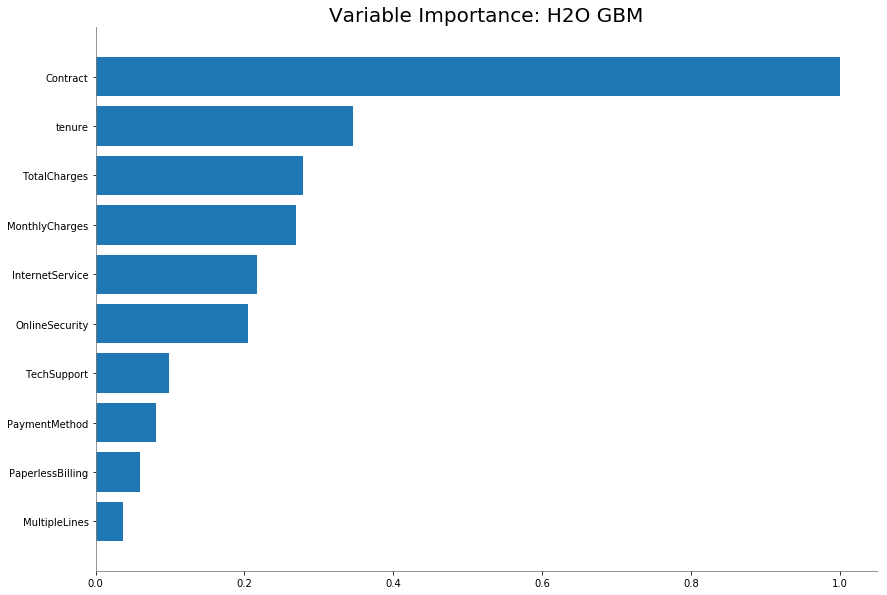

[('Contract', 817.3063354492188, 1.0, 0.3687717434264831),
 ('tenure', 282.8063049316406, 0.3460224063676209, 0.12760328606081456),
 ('TotalCharges', 227.68548583984375, 0.2785803510438962, 0.10273256173881928),
 ('MonthlyCharges', 220.181640625, 0.2693991604799941, 0.09934679808783833),
 ('InternetService',
  177.16183471679688,
  0.21676307527877273,
  0.07993609718103901),
 ('OnlineSecurity',
  167.0958709716797,
  0.20444705213234182,
  0.07539429585324878),
 ('TechSupport', 80.79318237304688, 0.09885299901491679, 0.03645419278966728),
 ('PaymentMethod',
  66.6995620727539,
  0.08160901143155046,
  0.030095097424924652),
 ('PaperlessBilling',
  48.286434173583984,
  0.05907997048260265,
  0.021787023716454537),
 ('MultipleLines',
  30.12062644958496,
  0.03685353354446918,
  0.013590541816620276),
 ('gender', 16.3416748046875, 0.019994552955111468, 0.007373426152289595),
 ('StreamingMovies',
  14.412489891052246,
  0.017634134553882616,
  0.006502970543252481),
 ('DeviceProtection'

In [99]:
## check Variable importance
gbm.varimp_plot()
gbm.varimp()

In [101]:
## check the performance of the trained model on testing dataset
gbm.model_performance(valid=True)


ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.14112856873073412
RMSE: 0.3756708249661319
LogLoss: 0.4319308142245305
Mean Per-Class Error: 0.23852360941717765
AUC: 0.8345733889007706
AUCPR: 0.6414862496479629
Gini: 0.6691467778015412

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2805972593253376: 


,,No,Yes,Error,Rate
0,No,1146.0,385.0,0.2515,(385.0/1531.0)
1,Yes,131.0,434.0,0.2319,(131.0/565.0)
2,Total,1277.0,819.0,0.2462,(516.0/2096.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.280597,0.627168,236.0
1,max f2,0.164772,0.752252,289.0
2,max f0point5,0.531708,0.616810,128.0
3,max accuracy,0.542159,0.794370,124.0
4,max precision,0.928999,1.000000,0.0
5,max recall,0.011309,1.000000,398.0
6,max specificity,0.928999,1.000000,0.0
7,max absolute_mcc,0.280597,0.469883,236.0
8,max min_per_class_accuracy,0.285583,0.752449,234.0
9,max mean_per_class_accuracy,0.187609,0.761476,277.0



Gains/Lift Table: Avg response rate: 26.96 %, avg score: 26.54 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010019,0.870549,3.179772,3.179772,0.857143,0.894088,0.857143,0.894088,0.031858,0.031858,217.977244,217.977244
1,,2,0.020515,0.854648,3.541110,3.364643,0.954545,0.861396,0.906977,0.877362,0.037168,0.069027,254.111022,236.464293
2,,3,0.030057,0.833618,2.782301,3.179772,0.750000,0.843071,0.857143,0.866476,0.026549,0.095575,178.230088,217.977244
3,,4,0.040076,0.811306,3.003118,3.135609,0.809524,0.822409,0.845238,0.855459,0.030088,0.125664,200.311842,213.560893
4,,5,0.050095,0.781385,2.826464,3.073780,0.761905,0.797664,0.828571,0.843900,0.028319,0.153982,182.646439,207.378003
5,,6,0.100191,0.685122,2.367164,2.720472,0.638095,0.733469,0.733333,0.788685,0.118584,0.272566,136.716393,172.047198
6,,7,0.150286,0.589257,2.013856,2.484933,0.542857,0.629695,0.669841,0.735688,0.100885,0.373451,101.385588,148.493328
7,,8,0.200382,0.525477,2.296502,2.437826,0.619048,0.557776,0.657143,0.691210,0.115044,0.488496,129.650232,143.782554
8,,9,0.300095,0.381274,1.579743,2.152708,0.425837,0.448171,0.580286,0.610455,0.157522,0.646018,57.974341,115.270763
9,,10,0.400286,0.262936,1.271909,1.932246,0.342857,0.320478,0.520858,0.537874,0.127434,0.773451,27.190898,93.224551


## Neural Networds

In [102]:
## initilize
from h2o.estimators import H2ODeepLearningEstimator
dl = H2ODeepLearningEstimator()
dl.train(x=predictors, y=target, training_frame=train, validation_frame=valid)
## print accuracy score for the training and testing dataset
print('training accuracy score', dl.auc(train=True))
print('testing accuracy score', dl.auc(valid=True))

deeplearning Model Build progress: |██████████████████████████████████████| 100%
training accuracy score 0.8874444476254149
testing accuracy score 0.8257429061923782


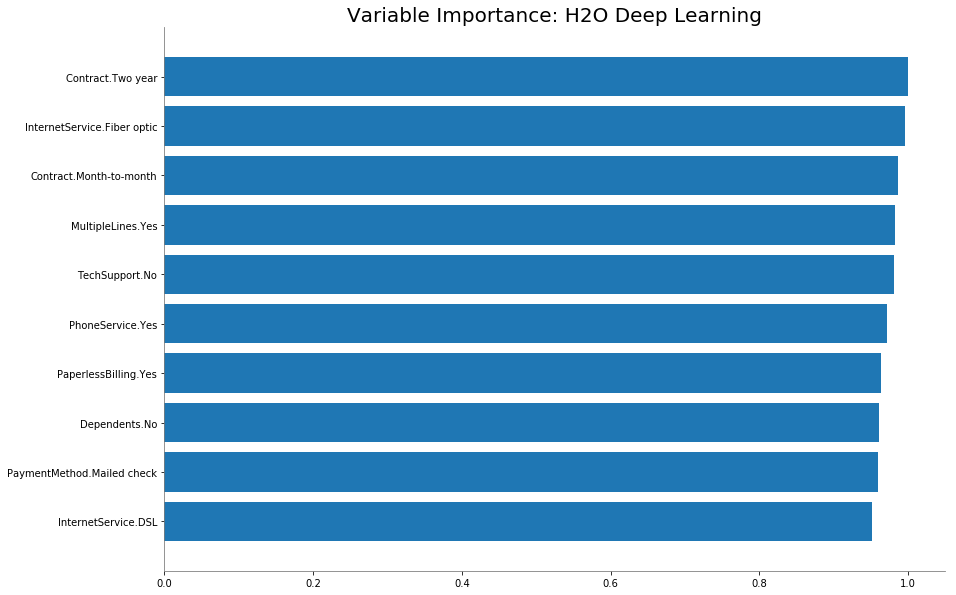

[('Contract.Two year', 1.0, 1.0, 0.025797264441448534),
 ('InternetService.Fiber optic',
  0.9956937432289124,
  0.9956937432289124,
  0.02568617479677201),
 ('Contract.Month-to-month',
  0.9857563972473145,
  0.9857563972473145,
  0.02542981845463856),
 ('MultipleLines.Yes',
  0.9816738963127136,
  0.9816738963127136,
  0.025324501098446202),
 ('TechSupport.No',
  0.9806309342384338,
  0.9806309342384338,
  0.025297595530013605),
 ('PhoneService.Yes',
  0.9717021584510803,
  0.9717021584510803,
  0.025067257539888844),
 ('PaperlessBilling.Yes',
  0.9631050825119019,
  0.9631050825119019,
  0.02484547649846264),
 ('Dependents.No',
  0.9607662558555603,
  0.9607662558555603,
  0.02478514116872629),
 ('PaymentMethod.Mailed check',
  0.9597622752189636,
  0.9597622752189636,
  0.02475924121474991),
 ('InternetService.DSL',
  0.9508575201034546,
  0.9508575201034546,
  0.024529522892248783),
 ('PaymentMethod.Credit card (automatic)',
  0.9375434517860413,
  0.9375434517860413,
  0.02418605

In [103]:
## check Variable importance
dl.varimp_plot()
dl.varimp()

In [104]:
## check the performance of the trained model on testing dataset
dl.model_performance(valid=True)


ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.1577540778208237
RMSE: 0.3971826756302743
LogLoss: 0.49173361120668424
Mean Per-Class Error: 0.24707895238810884
AUC: 0.8257429061923782
AUCPR: 0.6009081351999895
Gini: 0.6514858123847564

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.15000634556407844: 


,,No,Yes,Error,Rate
0,No,1124.0,407.0,0.2658,(407.0/1531.0)
1,Yes,129.0,436.0,0.2283,(129.0/565.0)
2,Total,1253.0,843.0,0.2557,(536.0/2096.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.150006,0.619318,265.0
1,max f2,0.057102,0.751793,333.0
2,max f0point5,0.317861,0.596768,172.0
3,max accuracy,0.317861,0.784828,172.0
4,max precision,0.897537,1.000000,0.0
5,max recall,0.000470,1.000000,398.0
6,max specificity,0.897537,1.000000,0.0
7,max absolute_mcc,0.212374,0.459263,229.0
8,max min_per_class_accuracy,0.165753,0.748530,257.0
9,max mean_per_class_accuracy,0.150006,0.752921,265.0



Gains/Lift Table: Avg response rate: 26.96 %, avg score: 17.09 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010019,0.710216,2.473156,2.473156,0.666667,0.776872,0.666667,0.776872,0.024779,0.024779,147.315634,147.315634
1,,2,0.020038,0.648623,3.003118,2.738137,0.809524,0.677262,0.738095,0.727067,0.030088,0.054867,200.311842,173.813738
2,,3,0.030057,0.604932,2.649810,2.708695,0.714286,0.624031,0.730159,0.692722,0.026549,0.081416,164.981037,170.869504
3,,4,0.040076,0.588379,2.649810,2.693974,0.714286,0.600023,0.726190,0.669547,0.026549,0.107965,164.981037,169.397387
4,,5,0.050095,0.567142,2.826464,2.720472,0.761905,0.577419,0.733333,0.651121,0.028319,0.136283,182.646439,172.047198
5,,6,0.100191,0.480632,2.755803,2.738137,0.742857,0.520101,0.738095,0.585611,0.138053,0.274336,175.580278,173.813738
6,,7,0.150286,0.405512,1.872533,2.449602,0.504762,0.443638,0.660317,0.538287,0.093805,0.368142,87.253266,144.960247
7,,8,0.200382,0.344008,1.837202,2.296502,0.495238,0.371644,0.619048,0.496626,0.092035,0.460177,83.720185,129.650232
8,,9,0.300095,0.234196,1.757243,2.117321,0.473684,0.285342,0.570747,0.426422,0.175221,0.635398,75.724266,111.732065
9,,10,0.400286,0.150294,1.324905,1.918981,0.357143,0.191383,0.517282,0.367592,0.132743,0.768142,32.490518,91.898067


## Let H2OAutoML select best-performing 10 models

### Train 10 bet-performing selected models by H2O

In [110]:
aml = H2OAutoML(max_models=10, seed=1)
aml.train(x=predictors, y=target, training_frame=train)

AutoML progress: |
11:59:46.262: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████████████████████| 100%


### Display model results of the training dataset

In [111]:
lb = aml.leaderboard # Leader board
print(lb.head(rows=lb.nrows)) # print leader board

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20200216_115946,0.850544,0.416871,0.662164,0.240737,0.365562,0.133636
StackedEnsemble_AllModels_AutoML_20200216_115946,0.850509,0.417038,0.662328,0.233238,0.36562,0.133678
GBM_5_AutoML_20200216_115946,0.848467,0.411121,0.661477,0.239301,0.36498,0.13321
GLM_1_AutoML_20200216_115946,0.847801,0.41321,0.653219,0.233246,0.366038,0.133984
GBM_grid__1_AutoML_20200216_115946_model_1,0.842607,0.462198,0.649071,0.236813,0.385512,0.148619
GBM_1_AutoML_20200216_115946,0.841779,0.420591,0.648631,0.240091,0.369963,0.136873
GBM_2_AutoML_20200216_115946,0.841048,0.421661,0.654749,0.237671,0.369614,0.136614
GBM_3_AutoML_20200216_115946,0.838457,0.427211,0.643211,0.244728,0.372045,0.138417
DeepLearning_1_AutoML_20200216_115946,0.83469,0.428621,0.635417,0.248396,0.372344,0.13864
GBM_4_AutoML_20200216_115946,0.832629,0.436432,0.636239,0.248553,0.375031,0.140648


### Checking model performance on test dataset

In [112]:
perf = aml.leader.model_performance(valid)
print(perf)


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.140583939895772
RMSE: 0.3749452491974955
LogLoss: 0.43309462610859295
Null degrees of freedom: 2095
Residual degrees of freedom: 2090
Null deviance: 2443.571520816474
Residual deviance: 1815.5326726472217
AIC: 1827.5326726472217
AUC: 0.8402449668502858
AUCPR: 0.6561233333659172
Gini: 0.6804899337005716

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2791631840471732: 


,,No,Yes,Error,Rate
0,No,1224.0,307.0,0.2005,(307.0/1531.0)
1,Yes,162.0,403.0,0.2867,(162.0/565.0)
2,Total,1386.0,710.0,0.2238,(469.0/2096.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.279163,0.632157,241.0
1,max f2,0.103237,0.753582,344.0
2,max f0point5,0.485872,0.631924,159.0
3,max accuracy,0.485872,0.801050,159.0
4,max precision,0.897172,1.000000,0.0
5,max recall,0.053638,1.000000,399.0
6,max specificity,0.897172,1.000000,0.0
7,max absolute_mcc,0.279163,0.480738,241.0
8,max min_per_class_accuracy,0.224191,0.753756,267.0
9,max mean_per_class_accuracy,0.165780,0.768577,301.0



Gains/Lift Table: Avg response rate: 26.96 %, avg score: 26.59 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010019,0.857220,3.533080,3.533080,0.952381,0.871005,0.952381,0.871005,0.035398,0.035398,253.308049,253.308049
1,,2,0.020038,0.840053,3.356426,3.444753,0.904762,0.848081,0.928571,0.859543,0.033628,0.069027,235.642646,244.475348
2,,3,0.030057,0.832509,2.649810,3.179772,0.714286,0.837344,0.857143,0.852143,0.026549,0.095575,164.981037,217.977244
3,,4,0.040076,0.819107,3.356426,3.223936,0.904762,0.826201,0.869048,0.845658,0.033628,0.129204,235.642646,222.393595
4,,5,0.050095,0.793437,3.179772,3.215103,0.857143,0.805836,0.866667,0.837693,0.031858,0.161062,217.977244,221.510324
5,,6,0.100191,0.705849,2.331833,2.773468,0.628571,0.757899,0.747619,0.797796,0.116814,0.277876,133.183312,177.346818
6,,7,0.150286,0.615069,2.261172,2.602703,0.609524,0.663772,0.701587,0.753122,0.113274,0.391150,126.117151,160.270263
7,,8,0.200382,0.524611,2.013856,2.455491,0.542857,0.567673,0.661905,0.706760,0.100885,0.492035,101.385588,145.549094
8,,9,0.300095,0.337211,1.544244,2.152708,0.416268,0.428721,0.580286,0.614375,0.153982,0.646018,54.424355,115.270763
9,,10,0.400286,0.206848,1.342571,1.949932,0.361905,0.266826,0.525626,0.527384,0.134513,0.780531,34.257059,94.993197
